<a href="https://colab.research.google.com/github/lamld203844/biosignal-processing/blob/main/final/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

1. Each student, by the order in the class list, processing the EEG data upload in file tab in the Teams class.
2. Requirements
    - Read data
    - Extract the channels data
    - Plot the original data in time-series with the full of title, units
    - Analyze the data to identify signal and noises
    - Design filters to eliminate the DC component, Electricity noise, and others (if contaminated)
    - Apply the filters to the data to reduce the noises and increase the SNR (signal to noise ratio) as well. Show the noise reduction and SNR increasing values
    - Show the difference between the original data and processed data in both time domain and frequency domain
    - Design spectrogram for each data channels with frequency resolution of 1 Hz
3. Write report
4. Present the works in steps, algorithms (if applicable), purposes, and goals
5. Show the parameters for the design jobs, explain the reason to choose that parameters.
6. Show each results and discuss about the results
<hr/>

Analyze directory tree and role of each file

In [ ]:
# sub-NORB00027
#     └── ses-1
#         ├── eeg
#         │   ├── sub-NORB00027_ses-1_coordsystem.json # coordinate system
#         │   ├── sub-NORB00027_ses-1_electrodes.tsv # electrodes: name, position(x,y,z), metadata: type + material
#         │   ├── sub-NORB00027_ses-1_task-EEG_channels.tsv # el
#         │   ├── sub-NORB00027_ses-1_task-EEG_eeg.edf
#         │   ├── sub-NORB00027_ses-1_task-EEG_eeg.json
#         │   └── sub-NORB00027_ses-1_task-EEG_events.tsv
#         └── sub-NORB00027_ses-1_scans.tsv

#### General (global) variable

In [7]:
import numpy as np
import pandas as pd
import mne

HOME = 'C:/Users/Admin/Desktop/20232 BioSignal processing/final'
data_path = f'{HOME}/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_task-EEG_eeg.edf'

import matplotlib
matplotlib.use('Qt5Agg')

raw = mne.io.read_raw_edf(data_path, preload=True)
electrodes = pd.read_csv(f'{HOME}/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_electrodes.tsv', delimiter='\t')

Extracting EDF parameters from C:\Users\Admin\Desktop\20232 BioSignal processing\final\sub-NORB00027\ses-1\eeg\sub-NORB00027_ses-1_task-EEG_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 118399  =      0.000 ...   591.995 secs...


<hr/>

# 1. Dataset

- Read json file

In [2]:
import json

with open(f'{HOME}/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_coordsystem.json', 'r') as f:
    coordinate_info = json.load(f)
print(json.dumps(coordinate_info, indent=4))

with open(f'{HOME}/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_task-EEG_eeg.json', 'r') as f:
    task_info = json.load(f)
print(json.dumps(task_info, indent=4))

{
    "EEGCoordinateSystem": "MNI305",
    "EEGCoordinateUnits": "mm"
}
{
    "TaskName": "EEG",
    "TaskDescription": "Resting EEG",
    "SamplingFrequency": 200,
    "EEGChannelCount": 19,
    "EOGChannelCount": 0,
    "ECGChannelCount": 0,
    "EMGChannelCount": 0,
    "MiscChannelCount": 0,
    "TriggerChannelCount": 0,
    "EEGPlacementScheme": "10-10",
    "EEGReference": "common",
    "PowerLineFrequency": 60,
    "SoftwareFilters": "n/a",
    "RecordingDuration": 596.24,
    "RecordingType": "continuous"
}


- Read .tsv file

In [3]:
import pandas as pd

# electrodes
electrodes = pd.read_csv(f'{HOME}/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_electrodes.tsv', delimiter='\t')
print(electrodes.to_string(index=False))

print ("="*100)
print()
# channels
channels = pd.read_csv(f'{HOME}/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_task-EEG_channels.tsv', delimiter='\t')
print(channels.to_string(index=False))

print ("="*100)
print()
# events
events = pd.read_csv(f'{HOME}/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_task-EEG_events.tsv', delimiter='\t')
print(events.to_string(index=False))


print ("="*100)
print()
# scans
scans = pd.read_csv(f'{HOME}/sub-NORB00027/ses-1/sub-NORB00027_ses-1_scans.tsv', delimiter='\t')
print(scans.to_string(index=False))

name   x    y   z type material
 Fp1 -32   77  19  cup  Ag/AgCl
 Fp2  32   77  19  cup  Ag/AgCl
  F3 -52   35  57  cup  Ag/AgCl
  F4  52   35  57  cup  Ag/AgCl
  C3 -69  -29  69  cup  Ag/AgCl
  C4  69  -29  69  cup  Ag/AgCl
  P3 -54  -92  44  cup  Ag/AgCl
  P4  54  -92  44  cup  Ag/AgCl
  O1 -31 -116  -7  cup  Ag/AgCl
  O2  31 -116  -7  cup  Ag/AgCl
  F7 -72   32   5  cup  Ag/AgCl
  F8  72   32   5  cup  Ag/AgCl
  T3 -83  -21  -4  cup  Ag/AgCl
  T4  83  -21  -4  cup  Ag/AgCl
  T5 -73  -74  -8  cup  Ag/AgCl
  T6  73  -74  -8  cup  Ag/AgCl
  FZ   0   37  84  cup  Ag/AgCl
  CZ   0  -34 105  cup  Ag/AgCl
  PZ   0  -98  66  cup  Ag/AgCl

name type units description  sampling_frequency  low_cutoff  high_cutoff  notch status
 Fp1  EEG    uV   electrode                 200         0.5          100    NaN   good
 Fp2  EEG    uV   electrode                 200         0.5          100    NaN   good
  F3  EEG    uV   electrode                 200         0.5          100    NaN   good
  F4  EEG  

# 2. Load data channels
- Basic infor of loading object

In [3]:
import mne
import matplotlib.pyplot as plt

# Load the EEG data
raw = mne.io.read_raw_edf(data_path, preload=True)
print('================= Basic information ===========================')

Extracting EDF parameters from C:\Users\Admin\Desktop\20232 BioSignal processing\final\sub-NORB00027\ses-1\eeg\sub-NORB00027_ses-1_task-EEG_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 118399  =      0.000 ...   591.995 secs...
================= Basic information ===========================


In [5]:
d = raw.to_data_frame()
d

,time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,FZ,CZ,PZ
0,0.000,37.794060,38.802208,35.275967,41.127494,32.365882,67.594096,31.063564,48.486317,17.823710,21.595655,38.462062,43.636654,22.867763,32.669299,10.572697,32.479961,41.396177,38.978471,48.259253
1,0.005,40.119658,42.150950,36.210545,44.238100,33.409961,71.876571,33.488515,53.148359,16.666285,20.902811,39.744096,46.530156,23.560606,37.821512,8.388764,37.816365,43.140376,41.414656,52.910449
2,0.010,39.887098,43.190215,33.874101,45.966214,31.437811,67.362611,31.871881,49.418725,16.434800,19.979021,37.413124,48.266258,22.405867,39.460852,7.239326,38.280401,44.652015,42.458735,49.654612
3,0.015,37.794060,41.920002,31.888124,46.542252,29.465662,65.047760,30.370721,48.719419,16.897770,20.440916,35.548346,49.192179,21.020181,37.821512,9.997978,36.888295,43.605496,40.950620,48.026693
4,0.020,34.538222,38.802208,30.603080,45.274968,30.509741,63.658850,31.409985,50.817338,17.129255,19.979021,34.149763,47.803298,21.020181,36.884746,13.331348,38.512418,41.396177,38.746453,48.724372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118395,591.975,36.398701,34.067780,40.182499,33.869414,40.370489,35.533410,38.684839,32.985027,17.823710,19.055230,39.044805,18.405310,19.403547,29.976097,4.940449,23.199257,38.140340,36.774304,34.305662
118396,591.980,33.840542,32.682093,36.444189,32.026092,38.514348,34.838955,37.530100,33.334680,19.675591,22.057550,35.781444,18.289570,17.325017,31.732533,5.400225,25.287416,36.512421,35.150181,34.770782
118397,591.985,30.003305,30.026194,32.004946,30.528393,35.034084,32.524104,35.451571,31.120210,19.907076,21.364707,32.051888,17.710870,17.209543,30.912863,6.549663,25.403425,34.884502,32.597987,32.677743
118398,591.990,27.328867,28.525034,29.318036,29.721939,32.249873,32.408361,33.834936,30.537455,19.907076,20.902811,28.905076,17.363649,16.170278,33.137682,6.089888,25.751451,32.326343,30.161803,31.166104


<hr>

In [6]:
# channel information
print(f'Channel names: {raw.ch_names}')
print(f'Number of channels: {len(raw.ch_names)}')

Channel names: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ']
Number of channels: 19


- Summarize statistic on each channel

In [7]:
d.describe()

,time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,FZ,CZ,PZ
count,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000,118400.000000
mean,295.997500,7.270163,6.427694,6.844579,6.264259,7.354548,6.816291,6.967986,7.751543,5.453543,6.682922,5.881834,7.215296,6.289558,7.745675,5.797608,6.368118,7.519240,6.224402,7.353963
std,170.896401,32.345300,32.354484,31.915020,32.390927,29.892493,30.749590,29.739084,30.370865,30.914219,30.258941,31.663531,31.729559,29.902849,29.802448,29.074897,29.718801,32.769295,32.828391,30.584355
min,0.000000,-230.580000,-229.790000,-232.130000,-229.380000,-229.930000,-229.980000,-229.330000,-230.770000,-231.370000,-229.560000,-232.630000,-229.510000,-230.020000,-231.850000,-229.430000,-230.860000,-230.350000,-231.090000,-230.580000
25%,147.998750,-5.578351,-6.925442,-5.845440,-7.029292,-4.176888,-4.976483,-4.040491,-3.495452,-5.787770,-4.501439,-5.942958,-4.974191,-4.153122,-1.639756,-4.140112,-3.250747,-6.278591,-7.425046,-4.182992
50%,295.997500,7.212440,6.354052,6.771356,6.104377,7.423991,6.829257,6.929526,7.693449,5.323515,6.584052,5.945000,7.178520,6.355000,7.727904,5.974944,6.377982,7.326160,6.147982,7.328720
75%,443.996250,20.003232,19.518073,19.621795,19.583669,18.792853,18.403512,18.015017,18.998901,16.550542,17.785017,17.483312,19.446971,16.978596,17.095564,15.860112,16.122721,21.163471,19.837020,18.724152
max,591.995000,245.470000,242.960000,246.140000,242.280000,245.010000,243.870000,243.420000,246.390000,242.480000,243.190000,244.520000,244.330000,242.730000,247.540000,241.150000,244.080000,245.700000,243.850000,245.470000


# 3. Plot original signal

#### Manual plot

- Channel seperately

In [8]:
# ========== Visualizing each channel purely with numpy ==============
data, times = raw[:] # data
ch_names = raw.ch_names # channel name
n_channels = len(ch_names) # num channel
s_frequency = raw.info['sfreq']

scaled_data = [data[i] * 10e6 for i in range(len(data))]

# Subplots
fig, axes = plt.subplots(n_channels, 1, figsize=(12, 2*n_channels))

# Plot each channel in a separate subplot
colors = plt.cm.get_cmap('tab20', n_channels) # each channel has its own color

for i in range(n_channels):
    axes[i].plot(times, scaled_data[i], label=ch_names[i], color=colors(i))
    axes[i].set_title(ch_names[i])
    axes[i].legend(loc='upper right')

# Set labels for the x-axis and y-axis
axes[-1].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude (µV)')

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14396\970184080.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', n_channels) # each channel has its own color


![image](../assets/multi-seperated-channels-manual.png)

- One figure

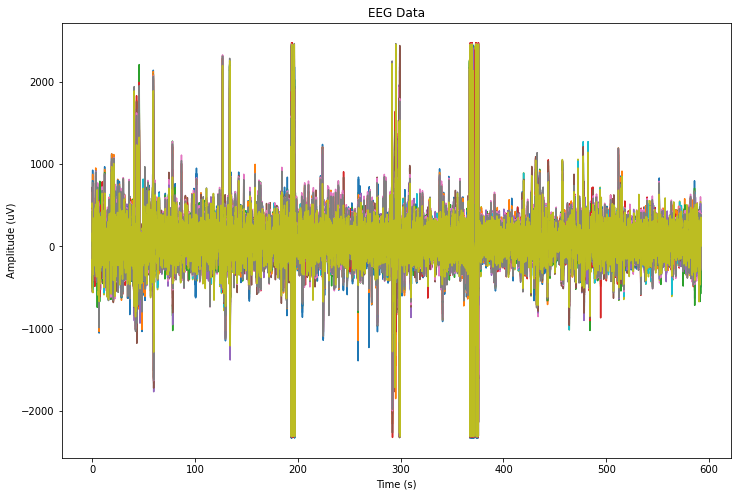

In [20]:
# Extract
data, times = raw[:]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each channel with an offset and scaling
for i, channel_data in enumerate(data):
    ax.plot(times, channel_data * 10e6) # from V to uV

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (uV)')
ax.set_title('EEG Data')
# ax.yaxis.set_ticklabels(raw.ch_names)

plt.show()

![image](../assets/multi-chs-one-plot.png)

### MNE

#### First plot

In [4]:
import mne
import matplotlib.pyplot as plt

# Load the EEG data
raw = mne.io.read_raw_edf(data_path, preload=True)

# ==== Visualize with MNE ========= 
# Plot the original data in time-series with the full title, units
raw.plot(title='Raw EEG data', show_options=True)

Extracting EDF parameters from C:\Users\Admin\Desktop\20232 BioSignal processing\final\sub-NORB00027\ses-1\eeg\sub-NORB00027_ses-1_task-EEG_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 118399  =      0.000 ...   591.995 secs...
Using matplotlib as 2D backend.


<MNEBrowseFigure size 800x800 with 4 Axes>

Channels marked as bad:
none


#### Plot the raw data again, but add event markers

In [11]:
import pandas as pd
import mne

df = pd.read_csv(f'{HOME}/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_task-EEG_events.tsv', sep='\t')

# Convert the DataFrame to MNE events
sfreq = raw.info['sfreq']
events = df[['onset', 'duration', 'value']].values
events[:, 0] = events[:, 0] * sfreq  # Convert onset from seconds to samples
events = events.astype(int)  # Convert data to integer

# Create an event_id dictionary
event_id = {
    'discontinuity' : 2,
    'eyes_closed' : 65,
}
print(events)
print(event_id)


[[    1     0     2]
 [    1     0    65]
 [ 8261     0     2]
 [ 9691     0     2]
 [27035     0     2]
 [39449     0     2]
 [59204     0     2]
 [59879     0     2]
 [75145     0     2]]
{'discontinuity': 2, 'eyes_closed': 65}


In [12]:
raw.plot(events=events, event_id=event_id, block=True)

Channels marked as bad:
none


<MNEBrowseFigure size 1000x1000 with 4 Axes>

![image](../assets/multi-seperated-channels.png)

# 4. Analysis original data

#### Time domain (original time series + power spectral density)

In [8]:
montage_dict = {row['name']: [row['x'], row['y'], row['z']] for _, row in electrodes.iterrows()} 
montage = mne.channels.make_dig_montage(ch_pos=montage_dict, coord_frame ='head') 
raw.set_montage(montage) 

# Analyze the data to identify signal and noises
psd_fig = raw.compute_psd().plot() # power spectral density
psd_fig.suptitle("Power Spectral Density of Original EEG Data")

Effective window size : 10.240 (s)


Plotting power spectral density (dB=True).


C:\Users\Admin\AppData\Local\Temp\ipykernel_4164\2267591046.py:6: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  psd_fig = raw.compute_psd().plot() # power spectral density


Text(0.5, 0.98, 'Power Spectral Density of Original EEG Data')

![image](../assets/psd.png)

#### Frequency domain (FFT)

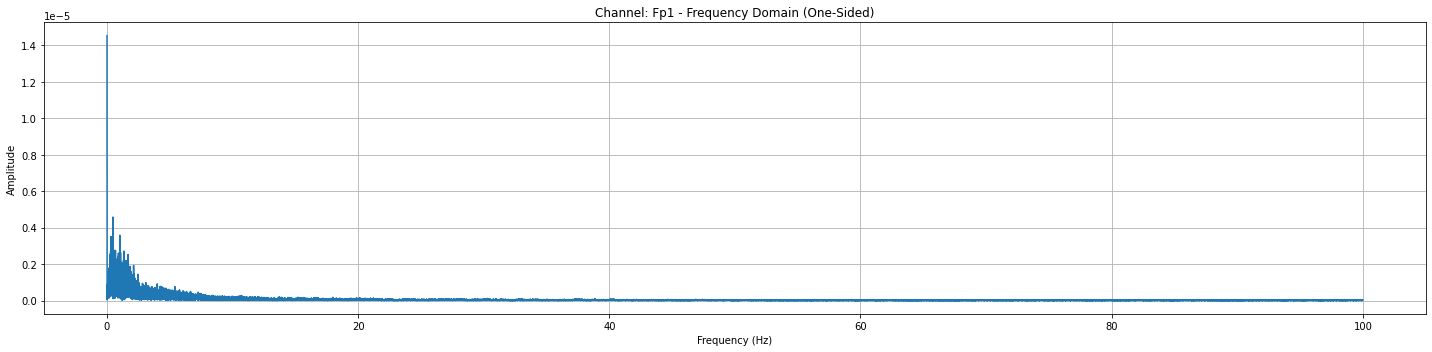

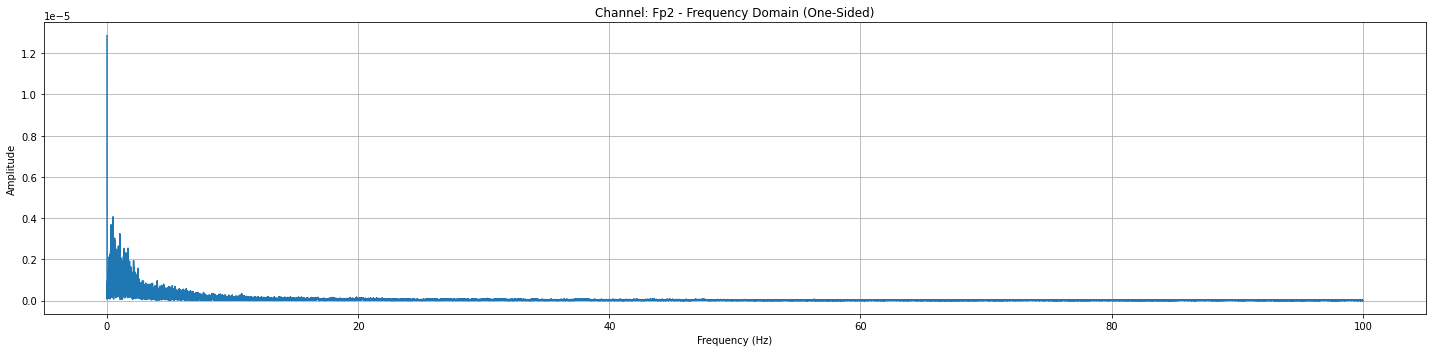

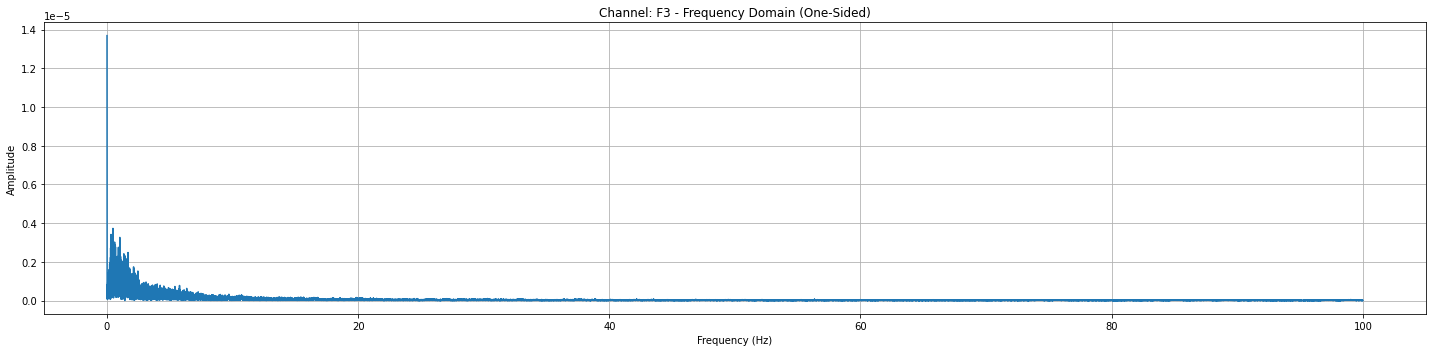

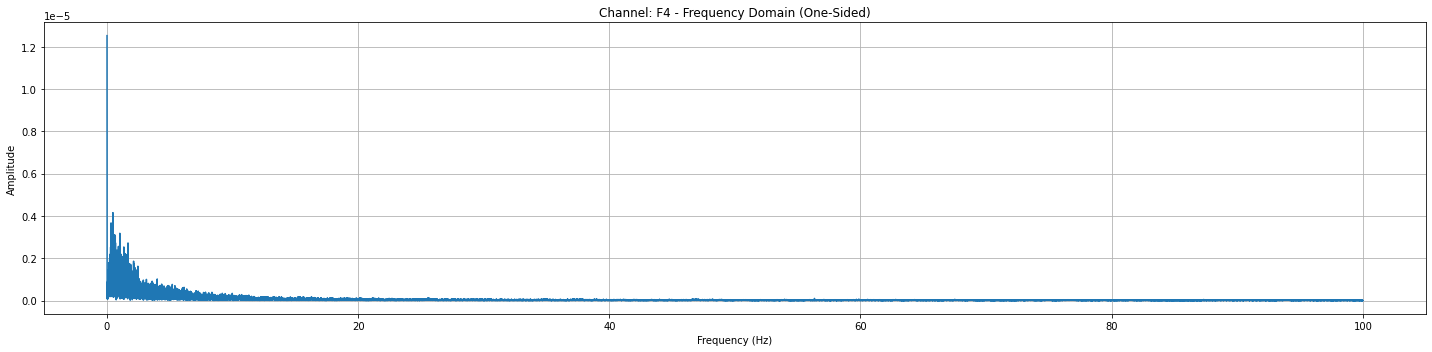

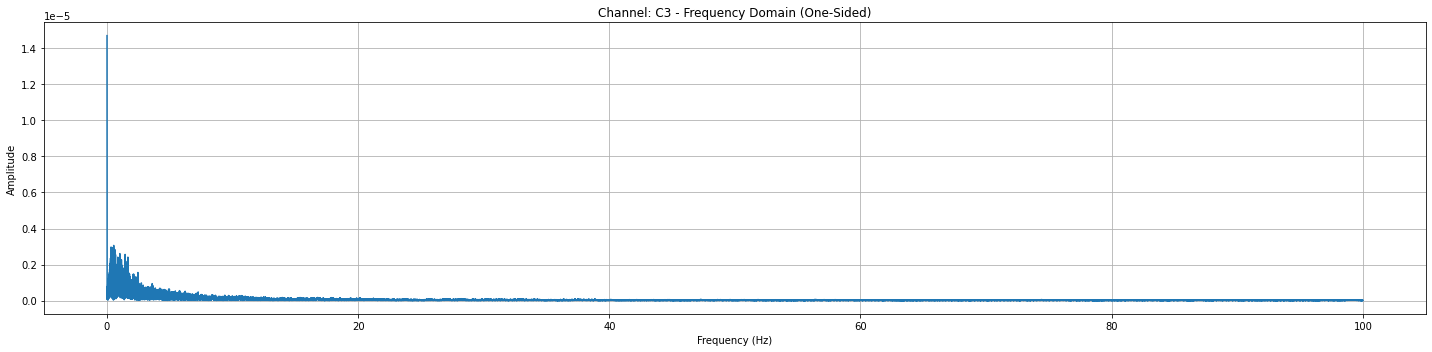

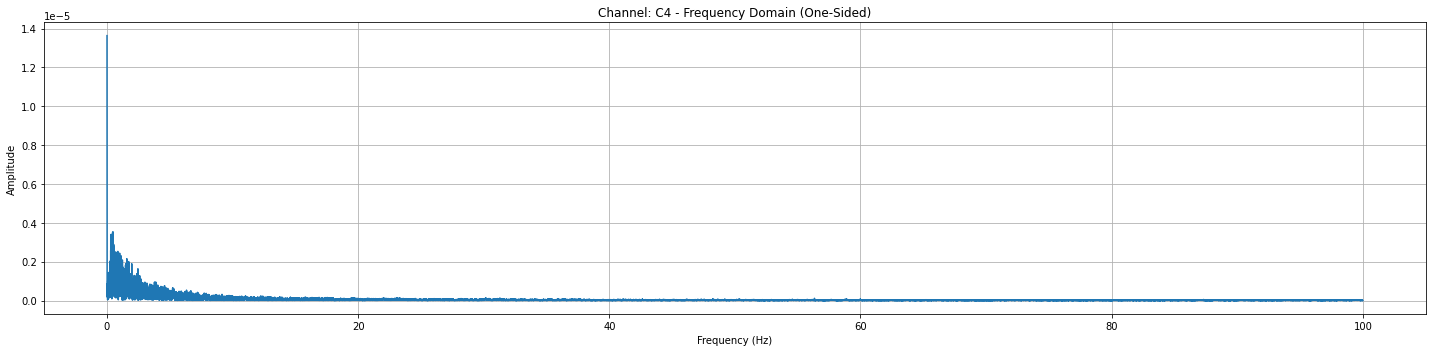

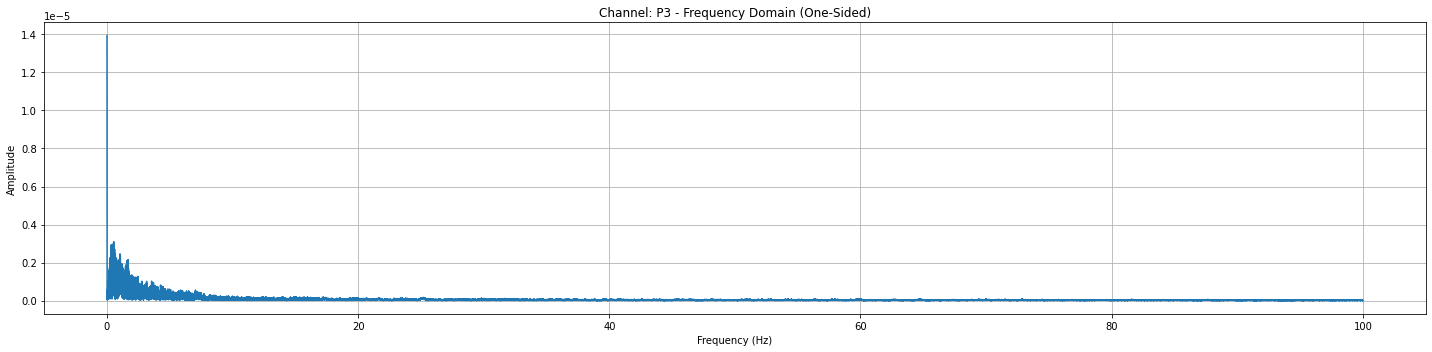

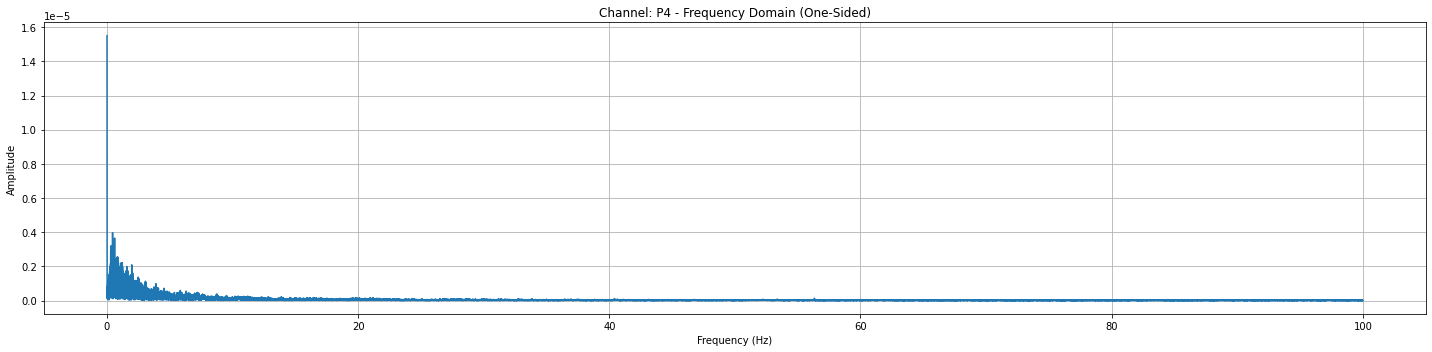

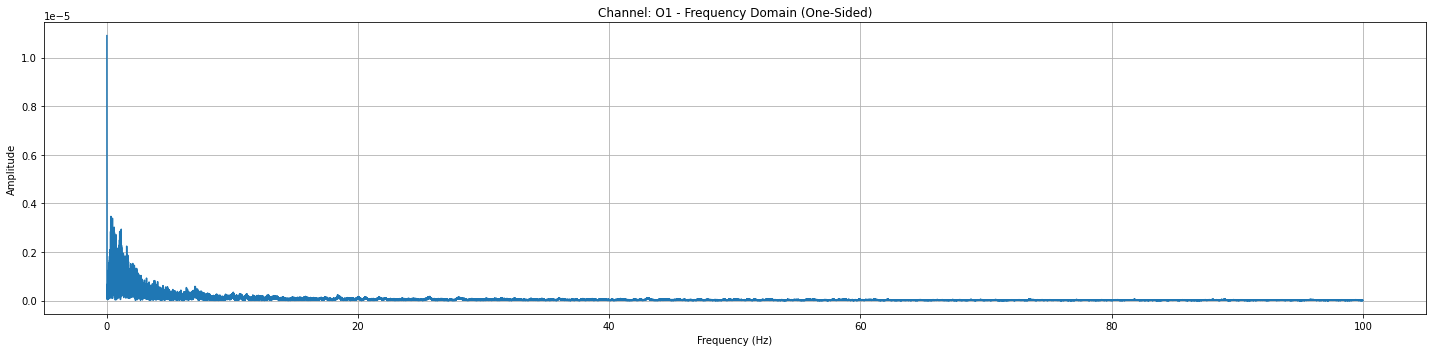

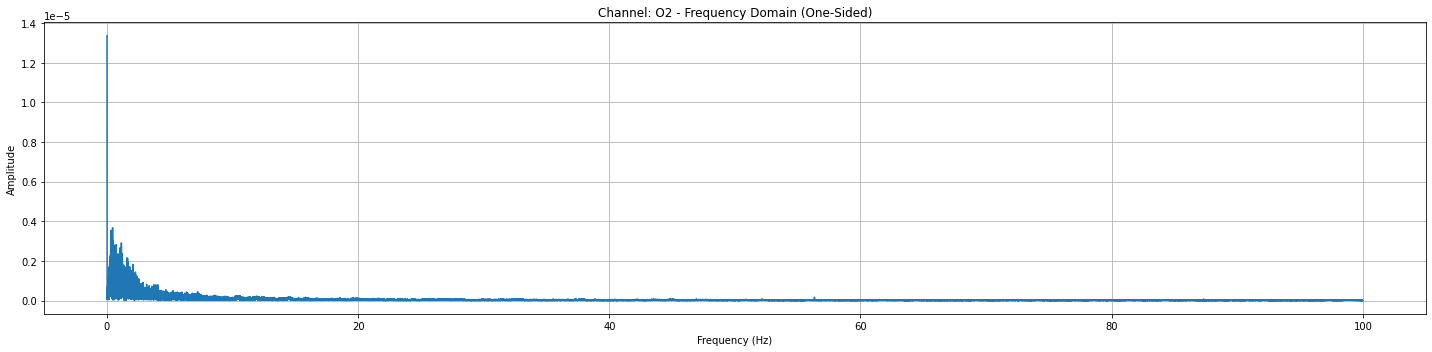

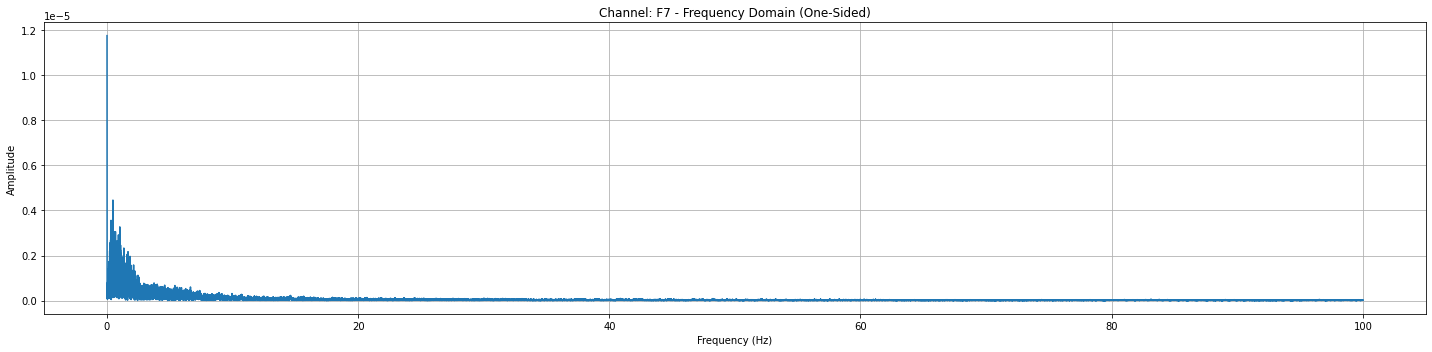

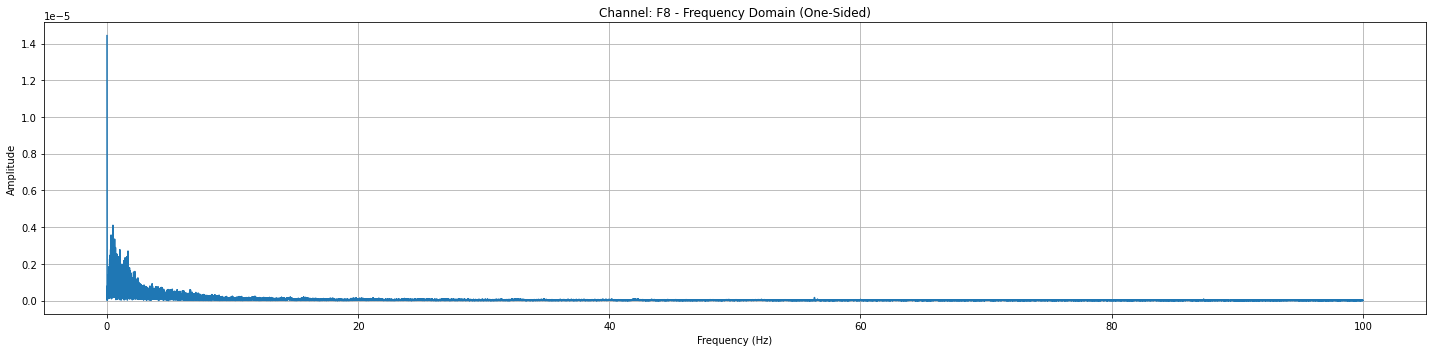

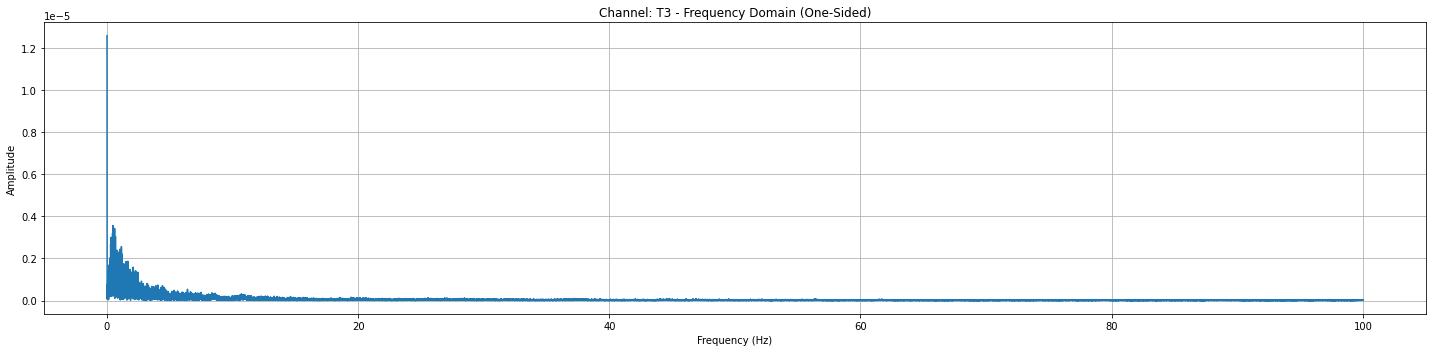

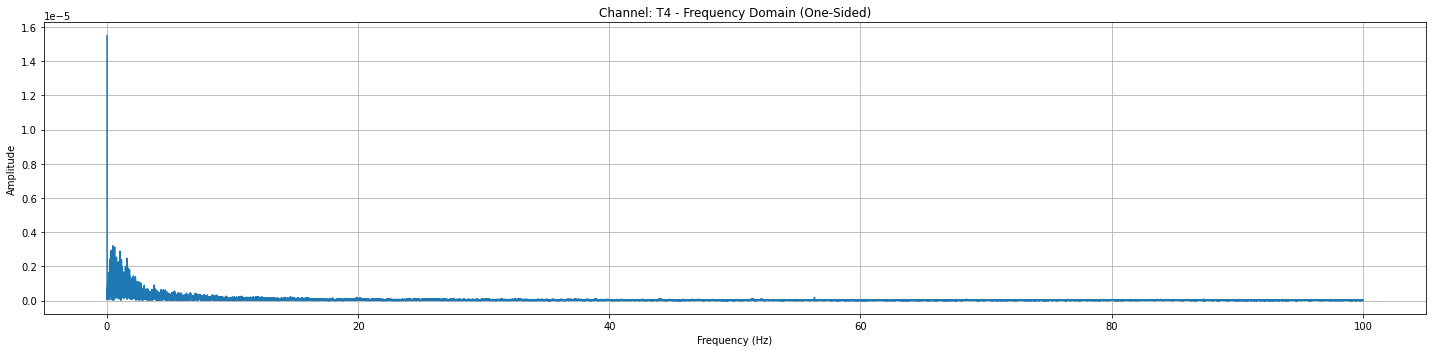

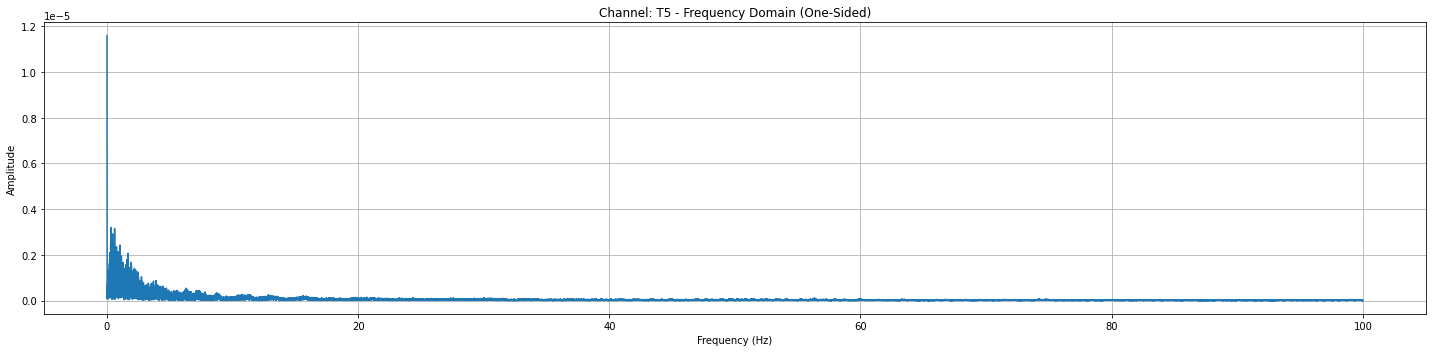

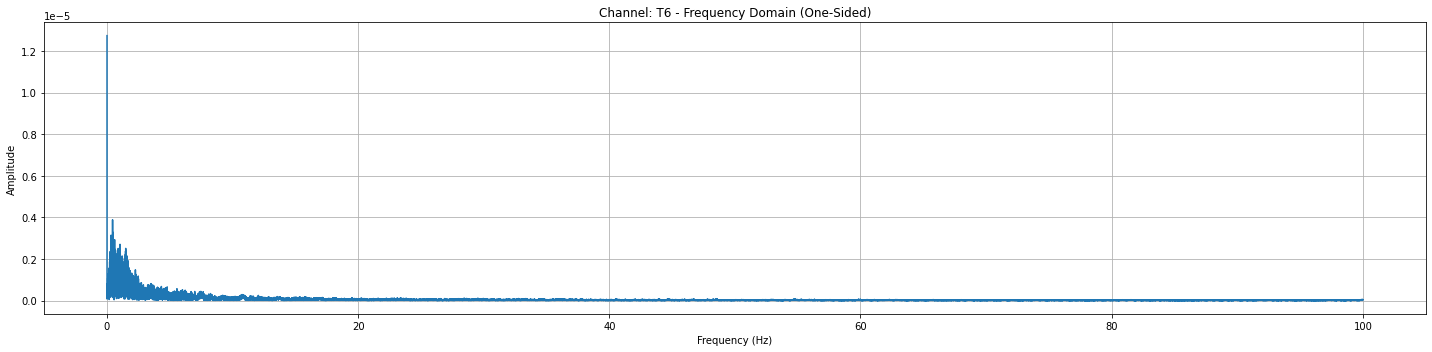

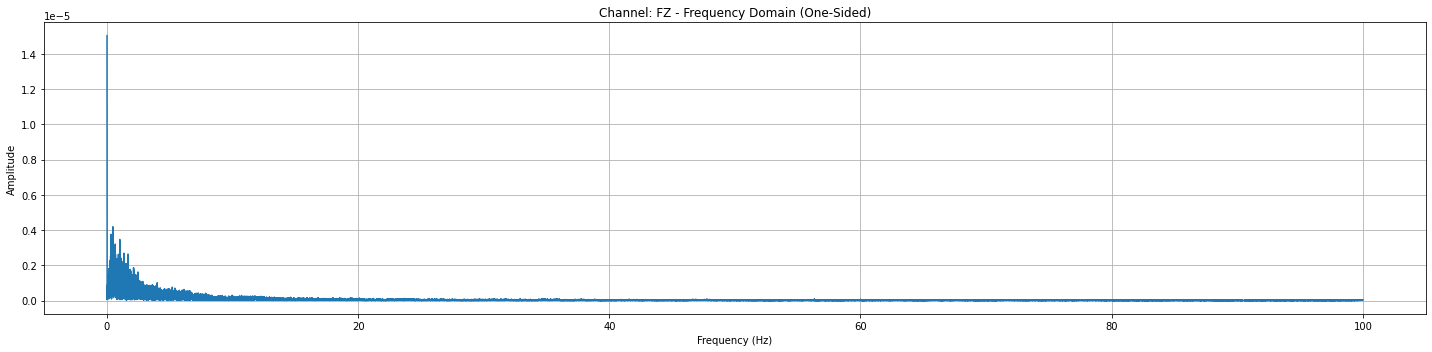

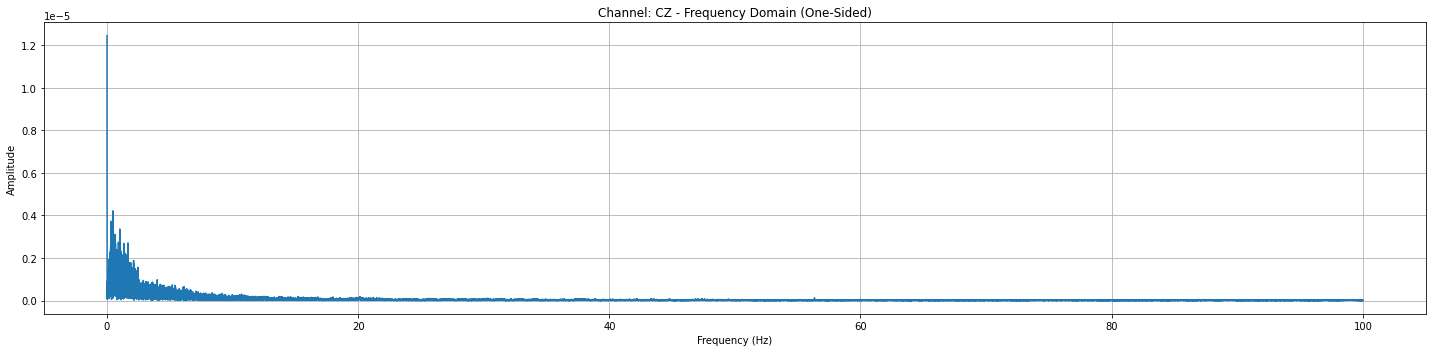

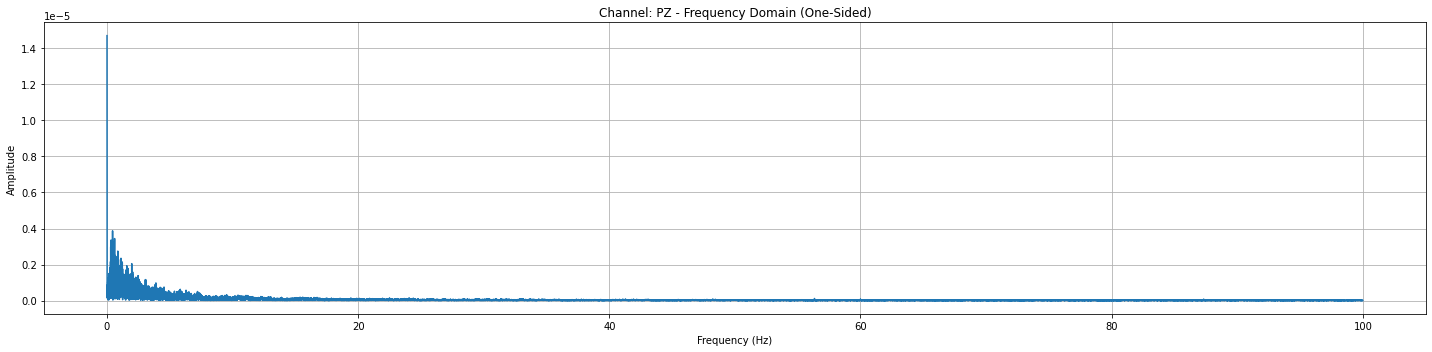

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def fft_plot(raw_mne):
    '''Performce Fourier Transform and plot from Raw obj of MNE.
    '''
    # extract
    ch_names = raw.info['ch_names']
    s_freq = raw_mne.info['sfreq']
    signal_data, _ = raw_mne[:]
    n_samples = signal_data.shape[1]


    # fft for each channel
    for ch_name, signal in zip(ch_names, signal_data):
        yf = fft(signal)
        xf = fftfreq(n_samples, 1/s_freq)

        plt.figure(figsize=(20, 5))
        half_len = n_samples//2
        plt.plot(xf[:half_len], 2.0/n_samples * np.abs(yf[0:half_len]))  # symmetric of FFT
        plt.xlabel('Frequency (Hz)') 
        plt.ylabel('Amplitude') 
        plt.title(f'Channel: {ch_name} - Frequency Domain (One-Sided)') 
        plt.tight_layout()
        plt.grid()
        plt.show()
        # break

fft_plot(raw)

- Time frequency domain (spectrogram)